# Predicting Diamond Prices

### Importing all necessary libraries

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

### Data Exploration

In [141]:
df = pd.read_csv('diamonds.csv')

In [142]:
df.shape

(53940, 11)

In [143]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


####  Data Cleaning Notes

The column `'Unnamed: 0'` comes from the old dataset and contains only index values and it should be removed.

Some features are currently stored as `float`, despite representing categorical information.

In [145]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Handling Anomalies in the Dataset

Some diamonds have a size equal to 0.

Abnormal values in features in all parameters. Some of these may come from rare diamonds with unusually large crystals.


### Clearing data

In [146]:
df = df.drop(columns=['Unnamed: 0'])
df = df[(df['x']>0 ) & (df['y']>0) & (df['z']>0)]

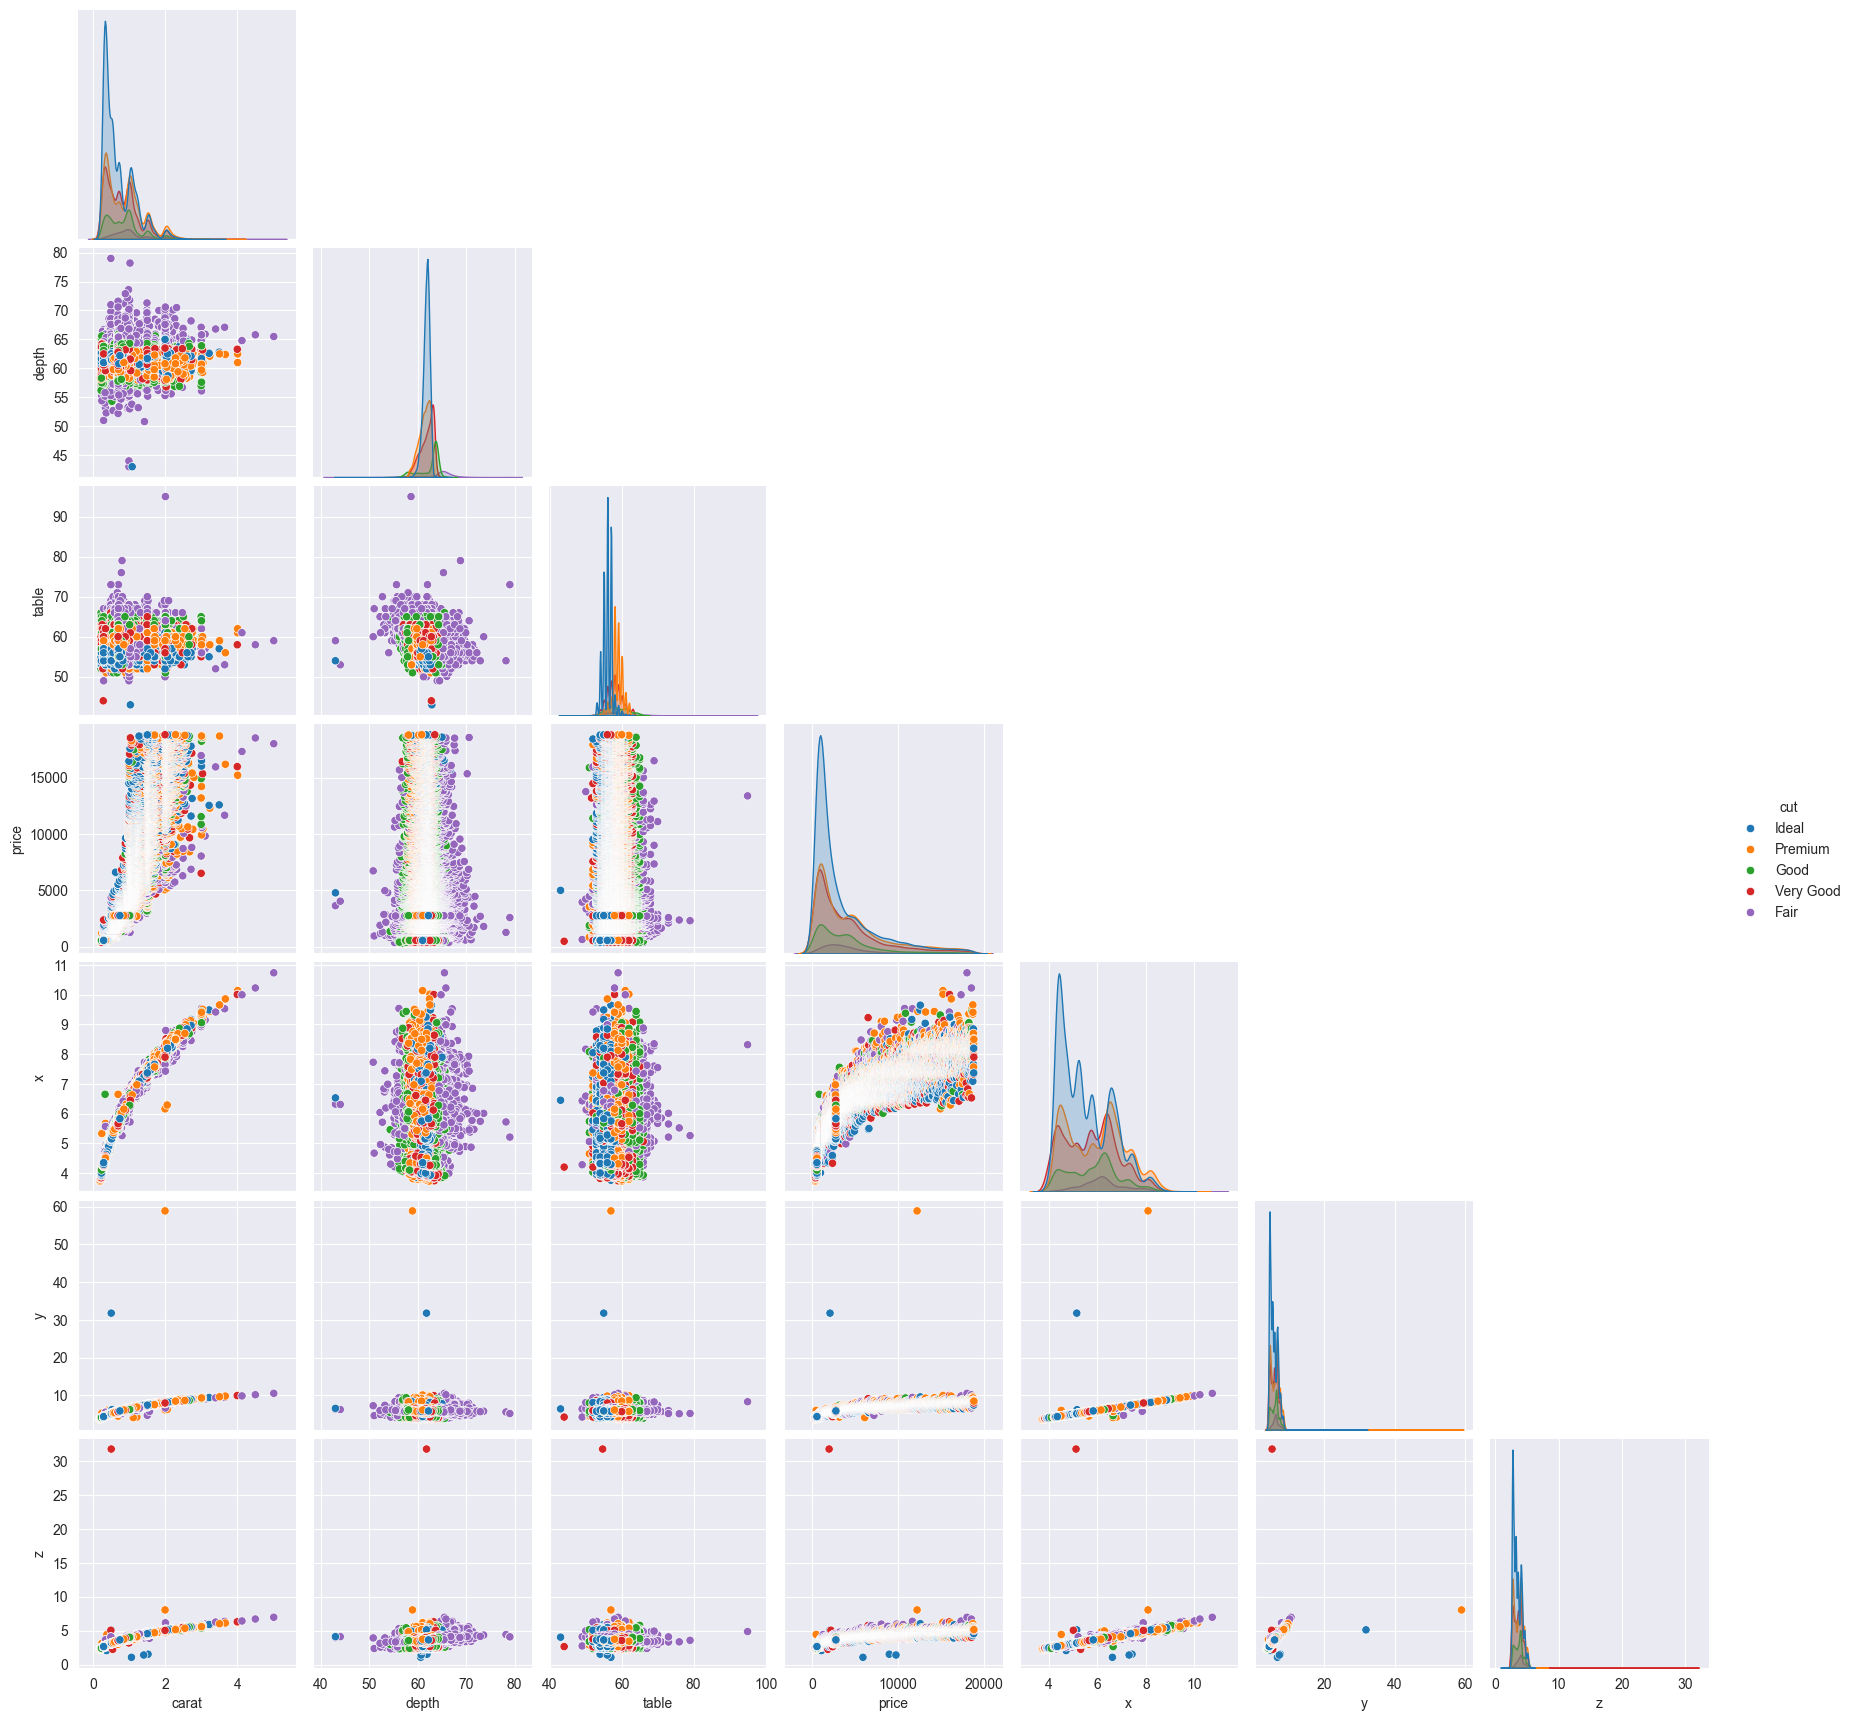

In [147]:
sns.pairplot(df, hue='cut', corner= True)

to delete unowmus size diamonds

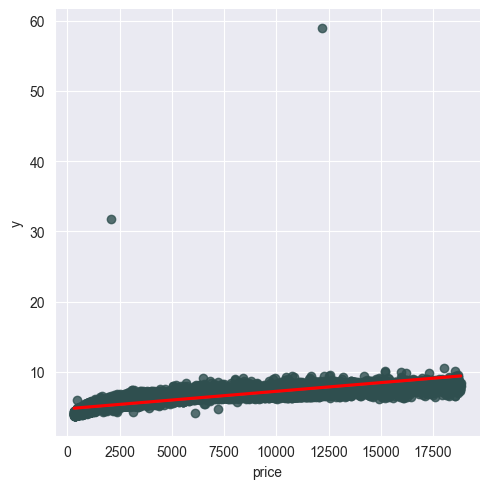

In [148]:
lm = sns.lmplot(
    x="price", y="y", data=df,
    scatter_kws={"color": "#2F4F4F"},
    line_kws={"color": "red"}
)

y>30

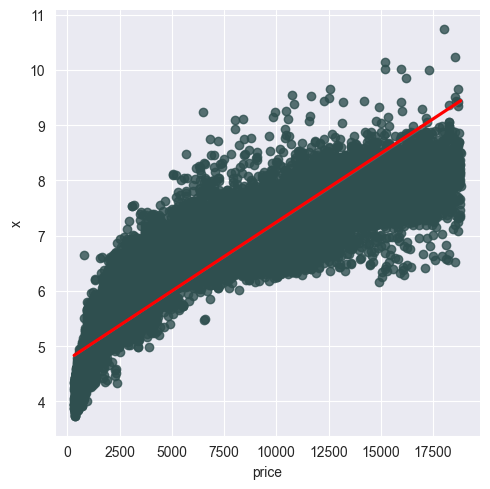

In [149]:
lm = sns.lmplot(
    x="price", y="x", data=df,
    scatter_kws={"color": "#2F4F4F"},
    line_kws={"color": "red"}
)

x>9

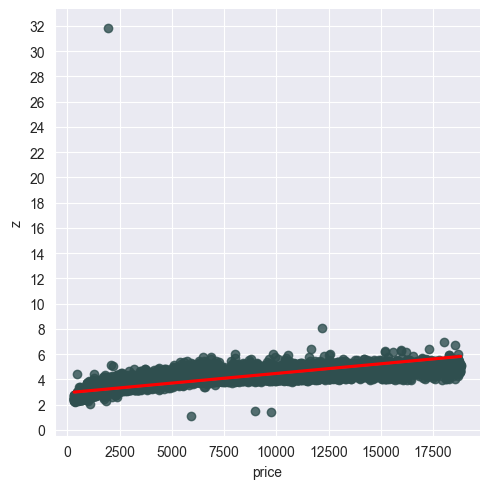

In [150]:
lm = sns.lmplot(
    x="price", y="z", data=df,
    scatter_kws={"color": "#2F4F4F"},
    line_kws={"color": "red"}
)
lm.ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

z<2 ans z>30

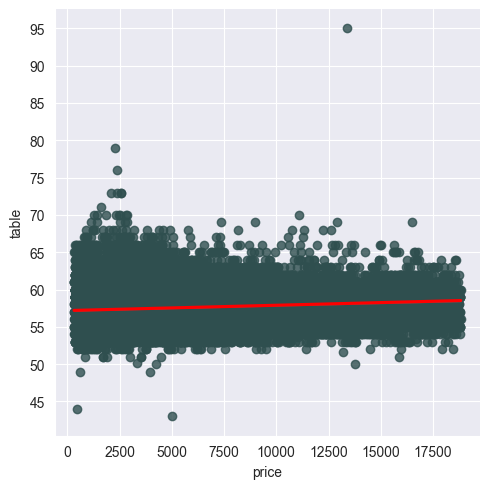

In [151]:
lm = sns.lmplot(
    x="price", y="table", data=df,
    scatter_kws={"color": "#2F4F4F"},
    line_kws={"color": "red"}
)
lm.ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

<50 and >75

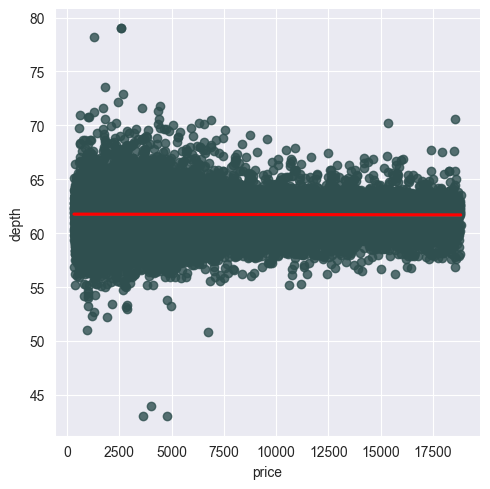

In [152]:
lm = sns.lmplot(
    x="price", y="depth", data=df,
    scatter_kws={"color": "#2F4F4F"},
    line_kws={"color": "red"}
)

<50 >75

In [153]:
df = df[
    (df['x'] < 9) &
    (df['y'] < 30) &
    (df['z'] > 2) & (df['z'] < 30) &
    (df['table'] > 50) & (df['table'] < 75) &
    (df['depth'] > 50) & (df['depth'] < 75)
]

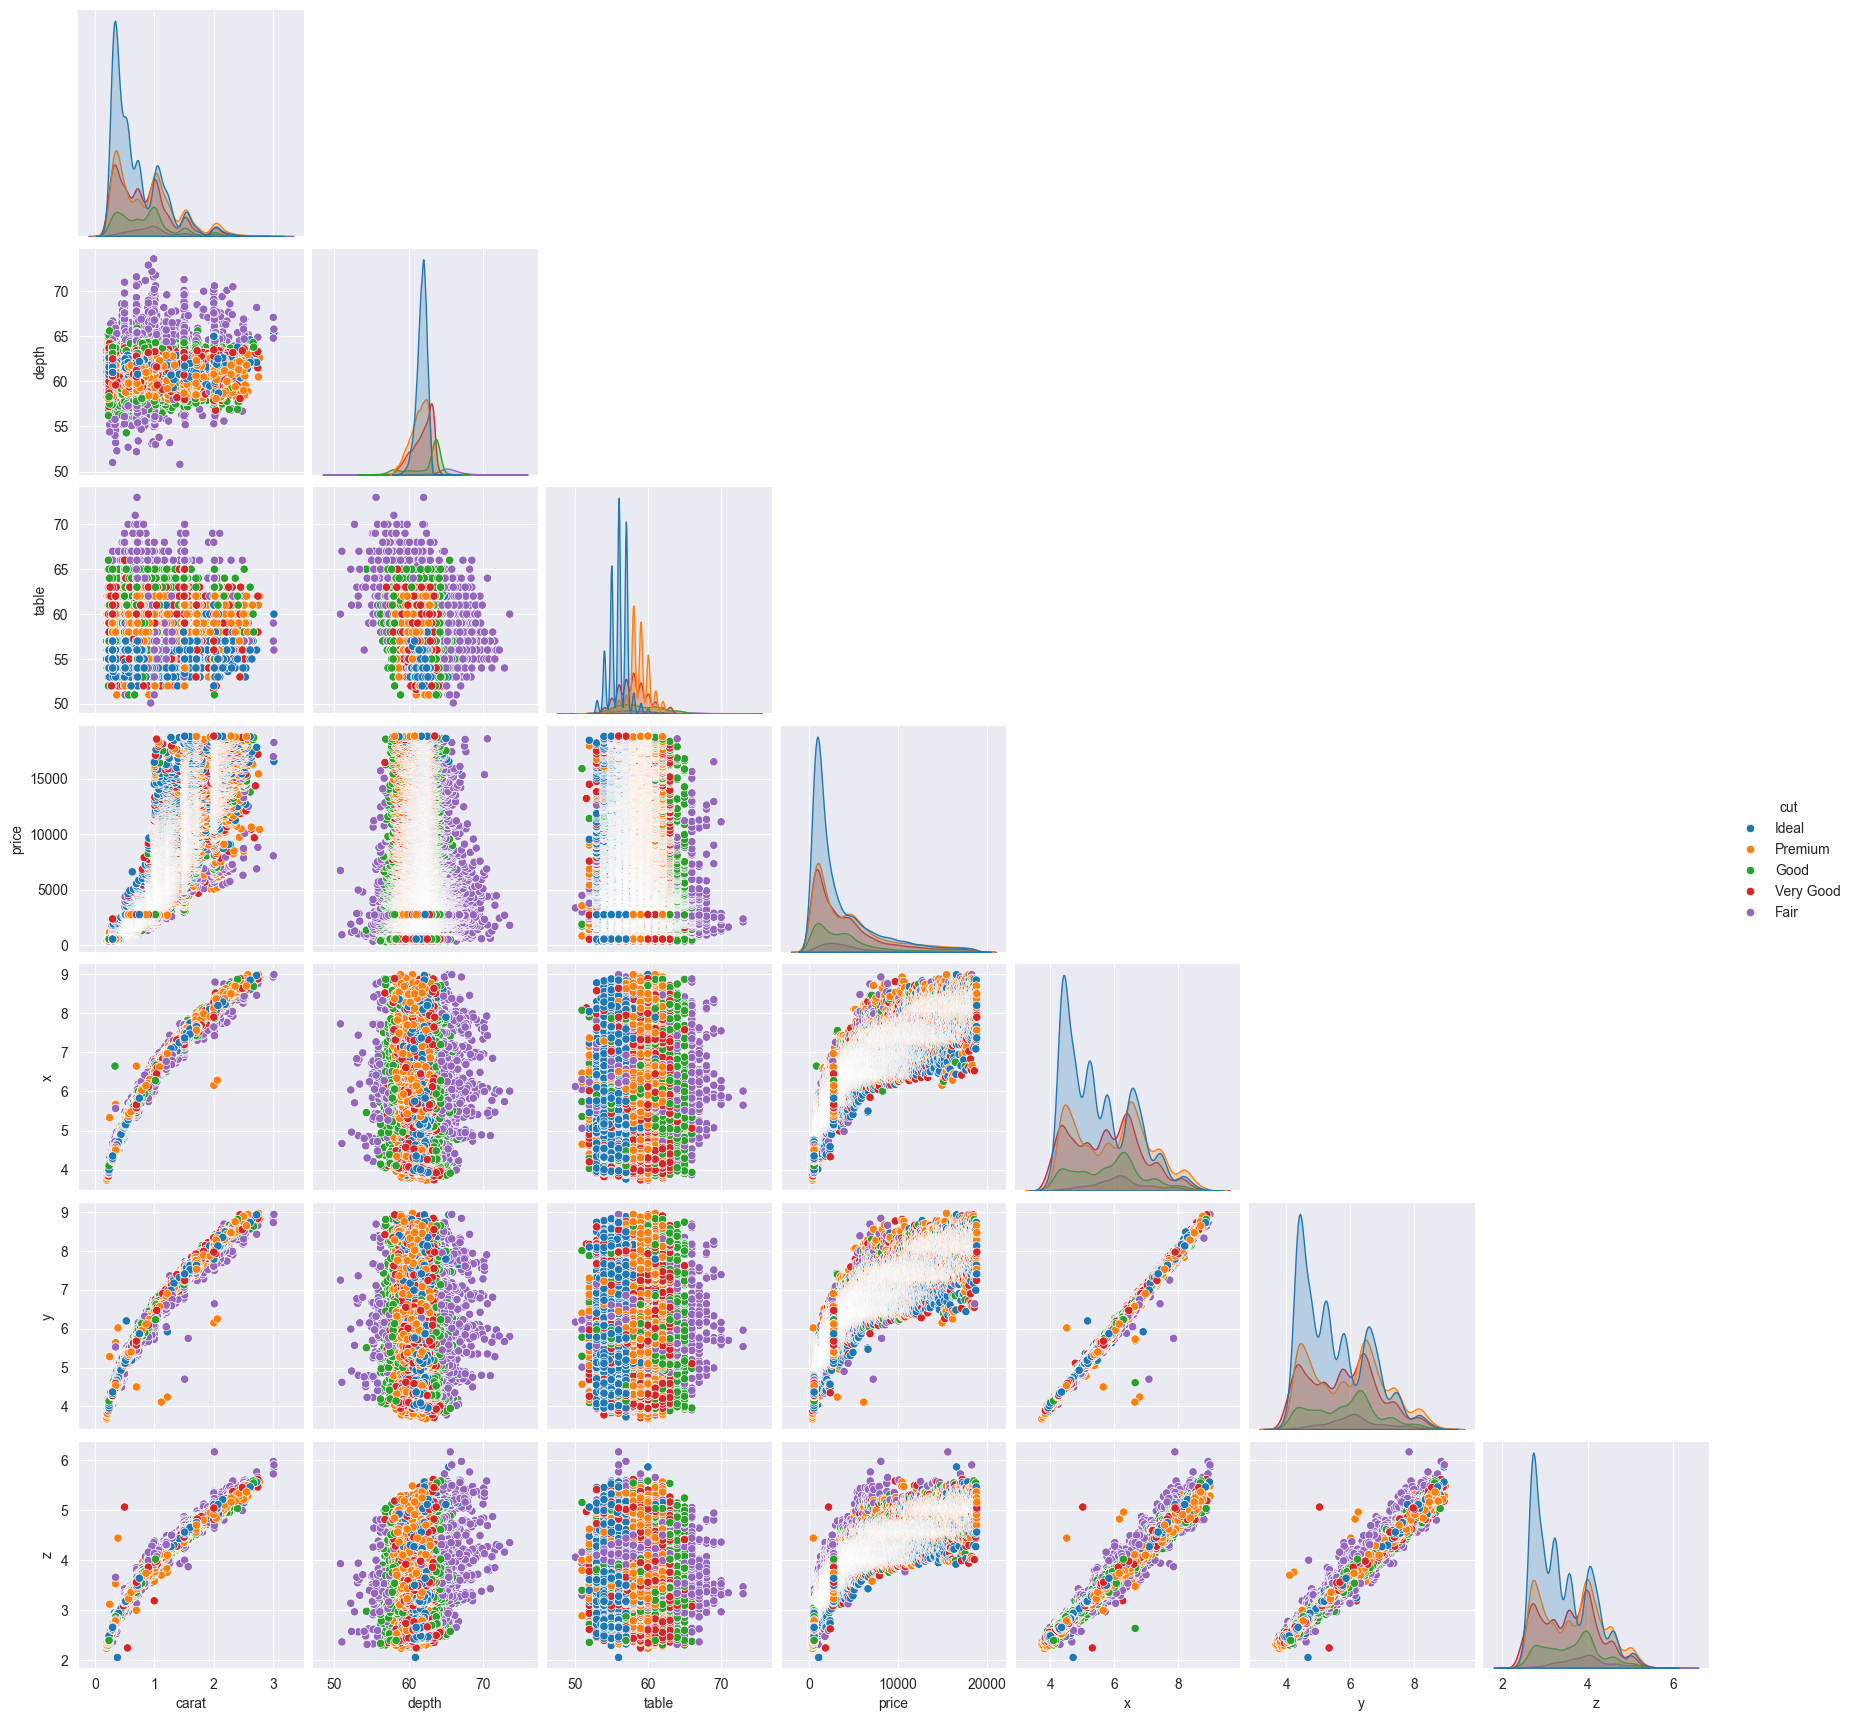

In [154]:
sns.pairplot(df, hue='cut',corner= True )

Our dataset became much cleaner

#### Implementiong regression

In [155]:
y = df['price']
X = df.drop('price', axis=1)

In [156]:
encoder = LabelEncoder()

X['cut'] = encoder.fit_transform(X['cut'])
X['color'] = encoder.fit_transform(X['color'])
X['clarity'] = encoder.fit_transform(X['clarity'])

In [157]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [159]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test)

Ridge Regression

In [160]:
alphas = [0.01, 0.1, 1, 10, 100]
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

Lasso

In [161]:
alphas = [ 0.01, 0.1, 1, 10, 100, 1000]
lasso = LassoCV(alphas=alphas, max_iter=50000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

Elastic Net

In [162]:
alphas = [ 0.01, 0.1, 1, 10, 100, 1000]
elastic = ElasticNetCV(alphas=alphas)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

In [164]:
results = []
models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Elastic Net": y_pred_elastic
}
for name, y_pred in models.items():
    results.append({
        "Model": name,
        "R²": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results)

               Model        R²          MAE
0  Linear Regression  0.889303   839.433785
1   Ridge Regression  0.889314   839.506499
2   Lasso Regression  0.889307   839.383730
3        Elastic Net  0.841432  1129.069492
